In [1]:
import sys
sys.path.append("..")

In [2]:
import os
from pathlib import Path
import torchaudio
from torch.utils import data
import json
import torchaudio.functional as F

In [3]:
from IPython import display

In [4]:
from src.utils import project_root

In [5]:
!ls /home/user/grandeur/data/ruLibriSpeech/ruls_data/train  

audio  manifest.json


In [6]:
data_path = project_root() / "data/ruLibriSpeech/ruls_data"

In [7]:
from src.data.rulibrispeech import ruLibriSpeechDataset

In [8]:
dataset = ruLibriSpeechDataset(data_path, "train")

In [14]:
from tqdm import tqdm

lengths = []
for item in tqdm(dataset):
    lengths.append(item['audio'].shape[-1])

100%|██████████| 54472/54472 [16:19<00:00, 55.60it/s]


In [16]:
import matplotlib.pyplot as plt

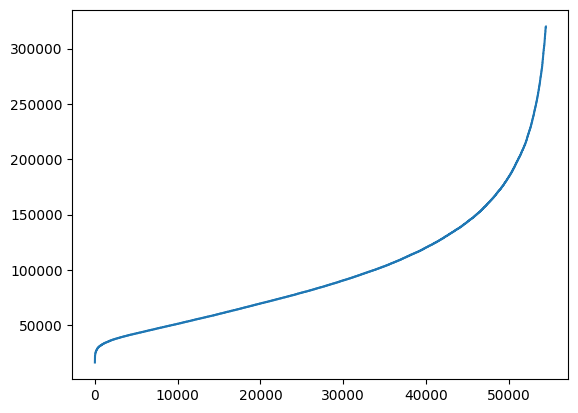

In [17]:
plt.plot(sorted(lengths))

In [18]:
import json
with open("lengths.json", 'w') as f:
    json.dump(lengths, f)

In [12]:
dataset[0]['audio'].shape[-1]

156160

In [9]:
batch = [dataset[i] for i in range(4)]

In [10]:
batch

[{'audio': tensor([[ 0.0003,  0.0003, -0.0001,  ...,  0.0022, -0.0019, -0.0004]]),
  'text': 'он сделал это так неловко что задел образок моего ангела висевший на дубовой спинке кровати и что убитая муха упала мне прямо на голову'},
 {'audio': tensor([[ 3.9673e-04, -9.1553e-05, -6.1035e-05,  ...,  1.0986e-03,
            8.5449e-04,  5.7983e-03]]),
  'text': 'я высунул нос из под одеяла остановил рукою образок который продолжал качаться скинул убитую муху на пол и хотя заспанными но сердитыми глазами окинул карла иваныча'},
 {'audio': tensor([[-0.0012,  0.0007,  0.0024,  ...,  0.0004,  0.0040,  0.0020]]),
  'text': 'он же в пестром ваточном халате подпоясанном поясом из той же материи в красной вязаной ермолке с кисточкой и в мягких козловых сапогах продолжал ходить около стен прицеливаться и хлопать'},
 {'audio': tensor([[ 1.5259e-03,  1.4648e-03,  9.4604e-04,  ..., -3.6621e-04,
           -6.4087e-04,  6.1035e-05]]),
  'text': 'отчего он не бьет мух около володи ной постели вон их ск

In [12]:
display.Audio(batch[1]['audio'].numpy(), rate=16000)

In [100]:
labels

('text', 'text', 'text', 'text')

In [13]:
from src.data.utils import ru_alphabet

In [14]:
t = 'отчего он не бьет мух около володи ной постели вон их сколько'

In [19]:
text = list(map(lambda x: ru_alphabet[x], t))

In [25]:
print(text)

[15, 19, 24, 6, 4, 15, 0, 15, 14, 0, 14, 6, 0, 2, 29, 6, 19, 0, 13, 20, 22, 0, 15, 11, 15, 12, 15, 0, 3, 15, 12, 15, 5, 9, 0, 14, 15, 10, 0, 16, 15, 18, 19, 6, 12, 9, 0, 3, 15, 14, 0, 9, 22, 0, 18, 11, 15, 12, 29, 11, 15]
